In [13]:
from experiment_utils import generate_blob_data, add_noise, get_graph, get_graph_magic, visuallize_graph, denoise_experiment, compare_denoised_signal
import numpy as np
from sklearn.datasets import make_blobs
## the output seems to be too much for this notebook, disabling tqdm.
from tqdm import tqdm
# from functools import partialmethod
# tqdm.__init__ = partialmethod(tqdm.__init__, disable=True) 

In [14]:
np.random.seed(32)
adata = generate_blob_data(n_cells=1000, n_genes=500, n_clusters=3, cluster_std=10.0, center_box=(-5, 5))

Running MAGIC on 1000 cells and 500 genes.
Calculating graph and diffusion operator...
  Calculating PCA...


/home/xs272/.local/lib/python3.9/site-packages/magic/magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


  Calculated PCA in 0.19 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.31 seconds.
  Calculating affinities...
  Calculated affinities in 0.28 seconds.
Calculated graph and diffusion operator in 0.80 seconds.
Calculating PHATE...
  Running PHATE on 1000 observations and 500 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.09 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.26 seconds.
    Calculating affinities...
    Calculated affinities in 0.15 seconds.
  Calculated graph and diffusion operator in 0.54 seconds.
  Calculating optimal t...
    Automatically selected t = 9
  Calculated optimal t in 2.06 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.56 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.26 seconds.
Calculated PHATE in 6.49 seconds.


/home/xs272/.local/lib/python3.9/site-packages/pygsp/plotting.py:274: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(G.coords[:, 0], G.coords[:, 1], marker='o',


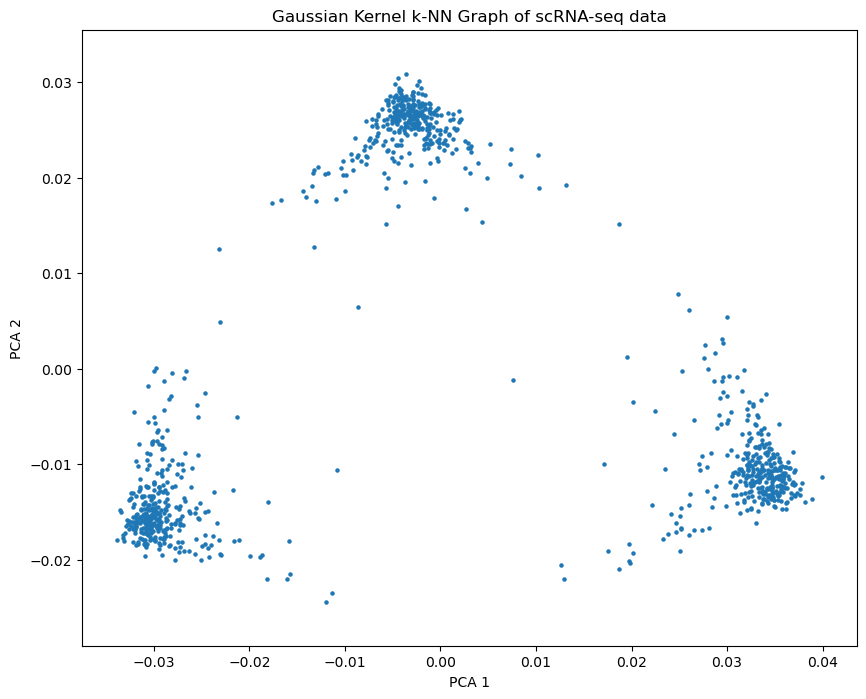

In [15]:
visuallize_graph(get_graph_magic(adata))

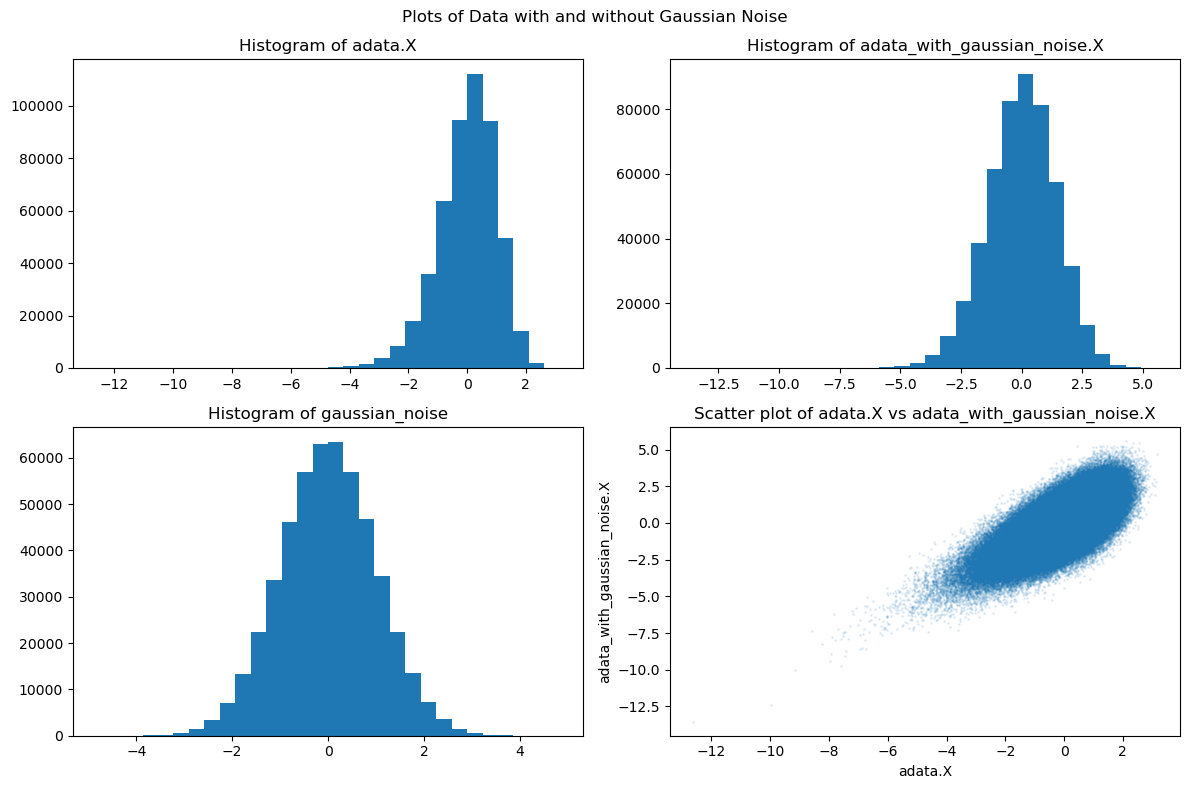

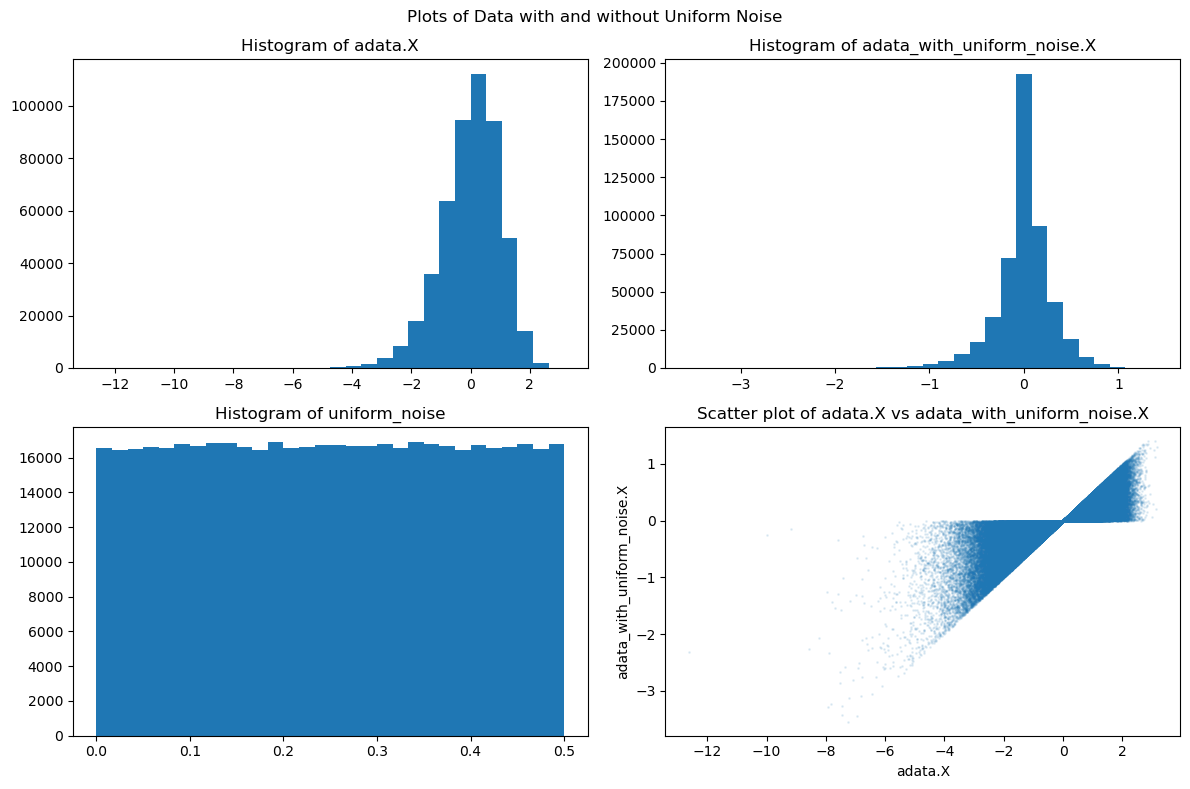

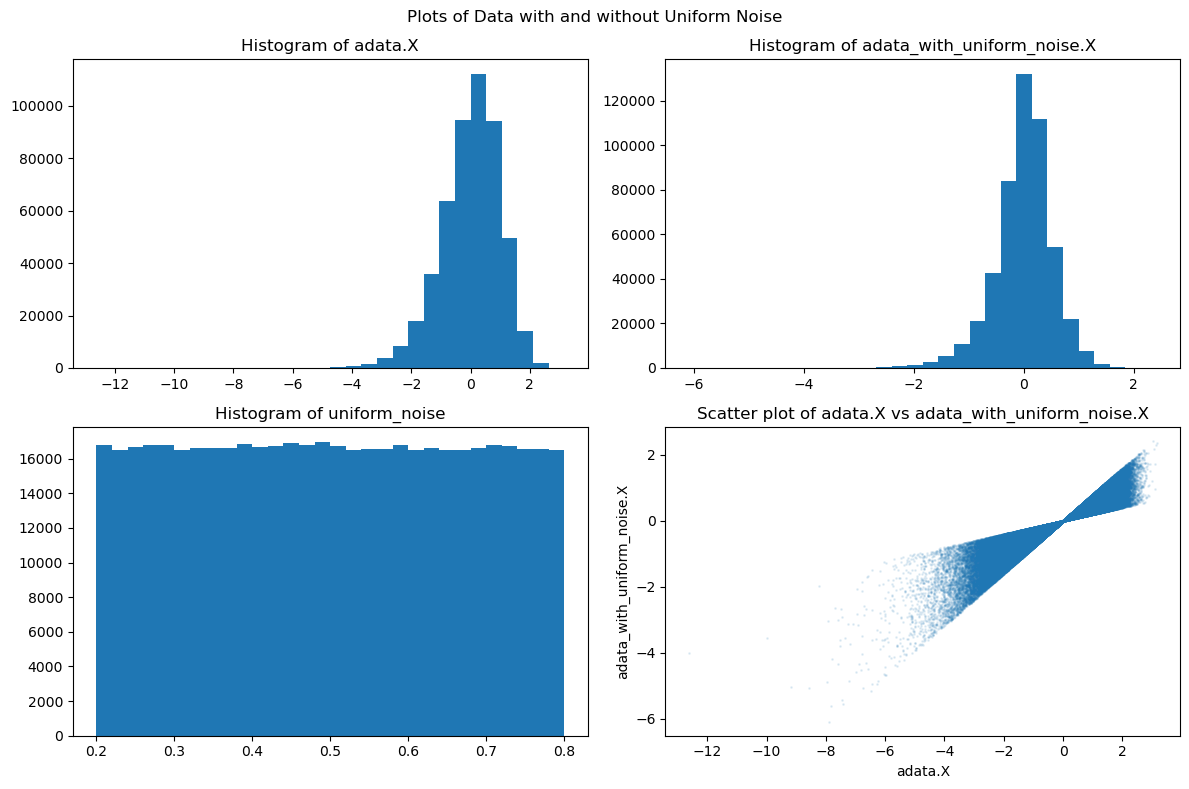

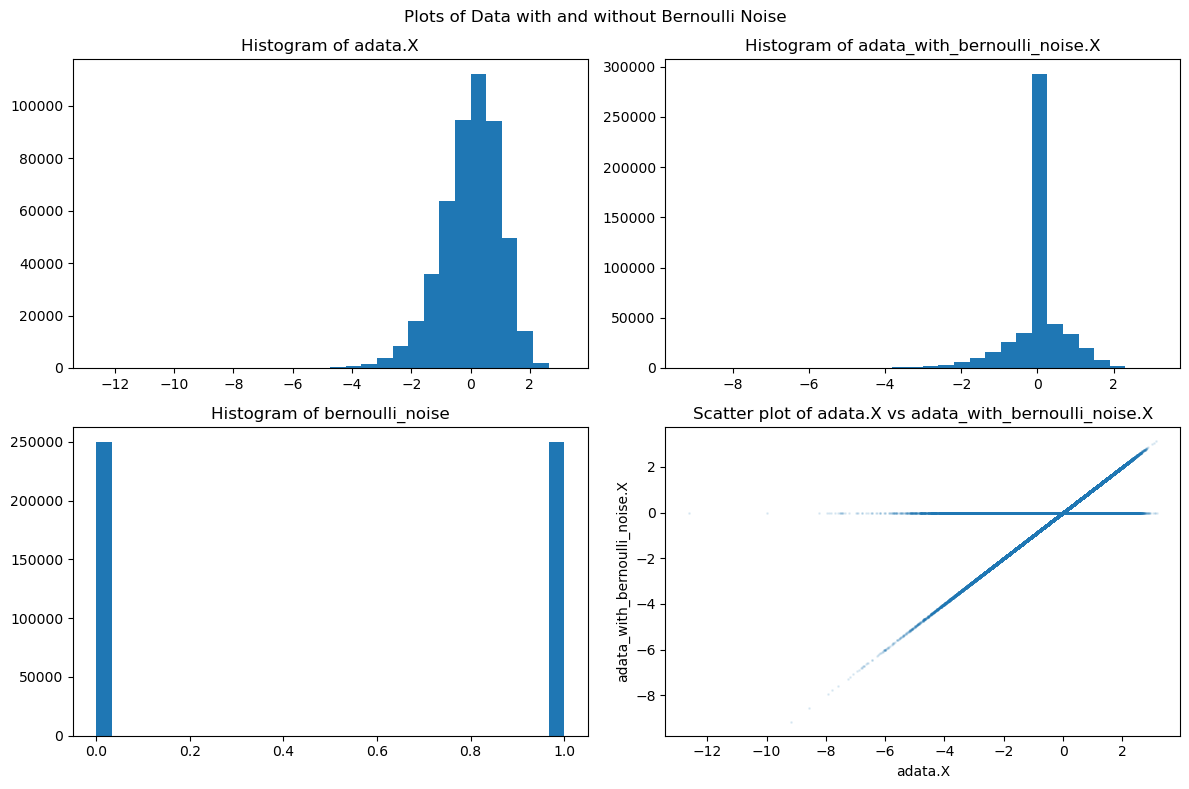

In [17]:
adata_gaussian = add_noise(adata, noise_type='gaussian', mean=0, std=1, noise_scale=1)
adata_uniform1 = add_noise(adata, noise_type='uniform', low=0, high=0.5)
adata_uniform2 = add_noise(adata, noise_type='uniform', low=0.2, high=0.8)
adata_bernoulli = add_noise(adata, noise_type='bernoulli', probability=0.5)

Running MAGIC on 1000 cells and 500 genes.
Calculating graph and diffusion operator...
  Calculating PCA...
  Calculated PCA in 0.13 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.26 seconds.
  Calculating affinities...
  Calculated affinities in 0.29 seconds.
Calculated graph and diffusion operator in 0.71 seconds.
Calculating PHATE...
  Running PHATE on 1000 observations and 500 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.08 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.27 seconds.
    Calculating affinities...
    Calculated affinities in 0.22 seconds.
  Calculated graph and diffusion operator in 0.61 seconds.
  Calculating optimal t...
    Automatically selected t = 11
  Calculated optimal t in 1.77 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.74 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.84 seconds.
Calculated PHATE in

2023-05-08 13:11:26,700:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.


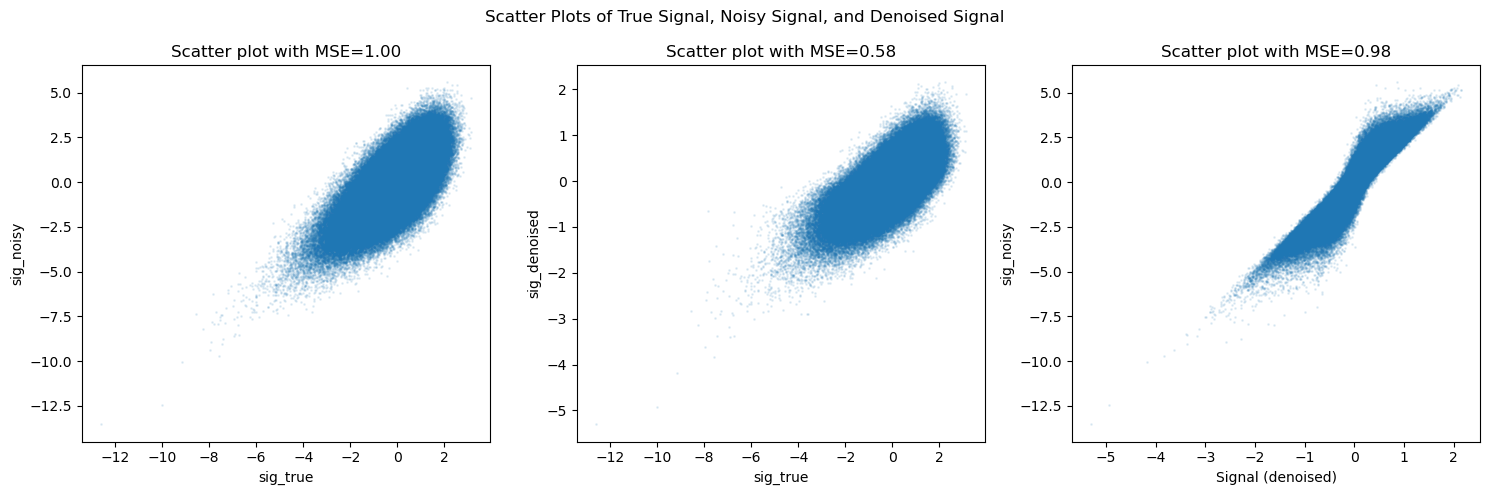

In [18]:
# pygsp_graph = get_graph(adata_gaussian)
pygsp_graph = get_graph_magic(adata_gaussian)
sig_denoised_gaussian = denoise_experiment(pygsp_graph, adata_gaussian.X, 'gaussian')
mse_dict_gaussian = compare_denoised_signal(adata.X, adata_gaussian.X, sig_denoised_gaussian)

Running MAGIC on 1000 cells and 500 genes.
Calculating graph and diffusion operator...
  Calculating PCA...
  Calculated PCA in 0.12 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.31 seconds.
  Calculating affinities...
  Calculated affinities in 0.30 seconds.
Calculated graph and diffusion operator in 0.76 seconds.
Calculating PHATE...
  Running PHATE on 1000 observations and 500 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.09 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.28 seconds.
    Calculating affinities...
    Calculated affinities in 0.14 seconds.
  Calculated graph and diffusion operator in 0.54 seconds.
  Calculating optimal t...
    Automatically selected t = 8
  Calculated optimal t in 2.14 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.44 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.47 seconds.
Calculated PHATE in 

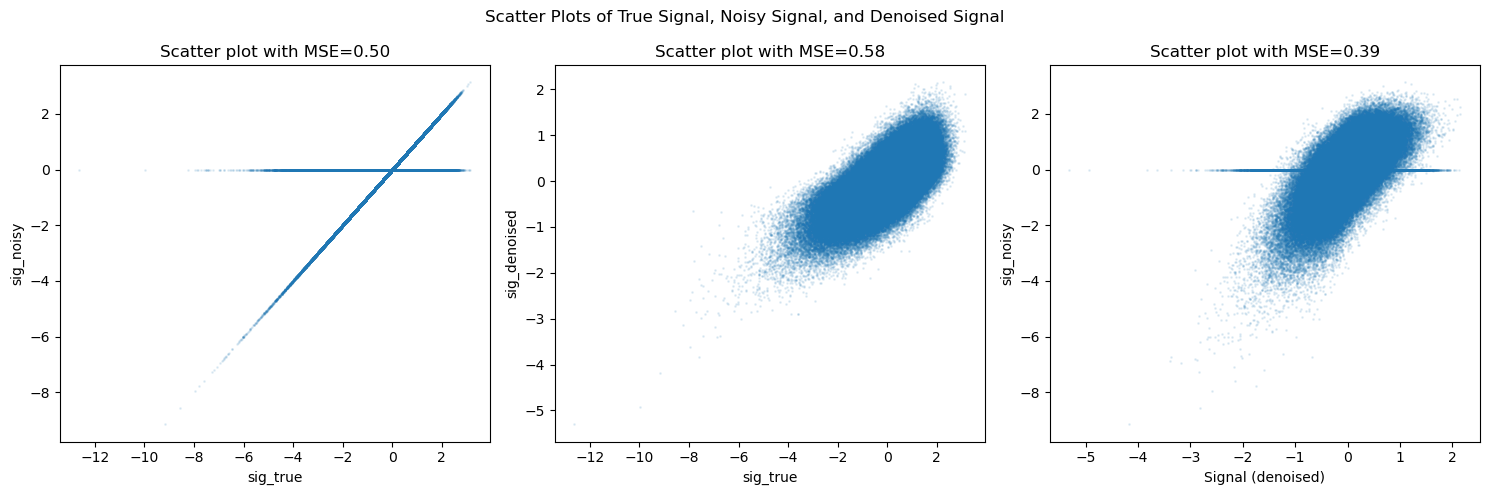

In [19]:
# pygsp_graph = get_graph(adata_bernoulli)
pygsp_graph = get_graph_magic(adata_bernoulli)
sig_denoised_bernoulli = denoise_experiment(pygsp_graph, adata_bernoulli.X, 'bernoulli')
mse_dict_bernoulli = compare_denoised_signal(adata.X, adata_bernoulli.X, sig_denoised_gaussian)

In [20]:
mse_dict_gaussian

{'MSE noisy': 0.99656737,
 'MSE denoised': 0.5817287115217222,
 'MSE denoised vs noisy': 0.9847028791130364}

In [21]:
mse_dict_bernoulli

{'MSE noisy': 0.50082415,
 'MSE denoised': 0.5817287115217222,
 'MSE denoised vs noisy': 0.39467044579849186}

Running MAGIC on 1000 cells and 500 genes.
Calculating graph and diffusion operator...
  Calculating PCA...
  Calculated PCA in 0.12 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.26 seconds.
  Calculating affinities...
  Calculated affinities in 0.30 seconds.
Calculated graph and diffusion operator in 0.72 seconds.
Calculating PHATE...
  Running PHATE on 1000 observations and 500 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.10 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.29 seconds.
    Calculating affinities...
    Calculated affinities in 0.12 seconds.
  Calculated graph and diffusion operator in 0.56 seconds.
  Calculating optimal t...
    Automatically selected t = 8
  Calculated optimal t in 2.04 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.46 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.15 seconds.
Calculated PHATE in 

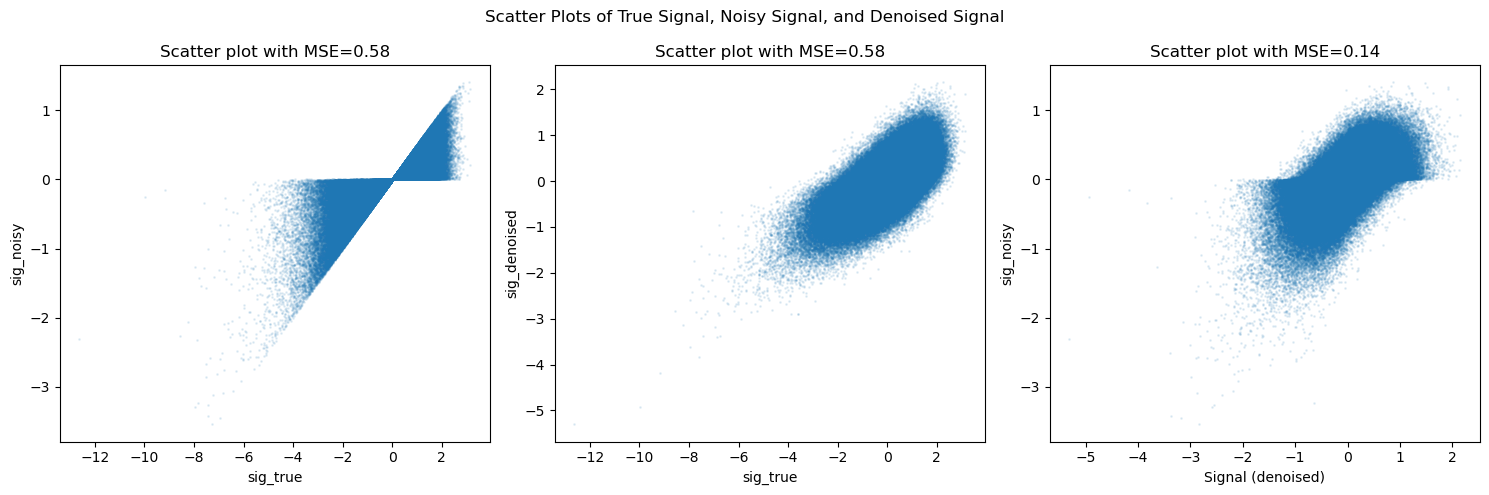

In [22]:
pygsp_graph = get_graph_magic(adata_uniform1)
sig_denoised_uniform1 = denoise_experiment(pygsp_graph, adata_uniform1.X, 'uniform')
mse_dict_uniform1 = compare_denoised_signal(adata.X, adata_uniform1.X, sig_denoised_gaussian)

Running MAGIC on 1000 cells and 500 genes.
Calculating graph and diffusion operator...
  Calculating PCA...
  Calculated PCA in 0.34 seconds.
  Calculating KNN search...
  Calculated KNN search in 0.33 seconds.
  Calculating affinities...
  Calculated affinities in 0.28 seconds.
Calculated graph and diffusion operator in 0.99 seconds.
Calculating PHATE...
  Running PHATE on 1000 observations and 500 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.10 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.28 seconds.
    Calculating affinities...
    Calculated affinities in 0.14 seconds.
  Calculated graph and diffusion operator in 0.55 seconds.
  Calculating optimal t...
    Automatically selected t = 9
  Calculated optimal t in 1.69 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.55 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.01 seconds.
Calculated PHATE in 

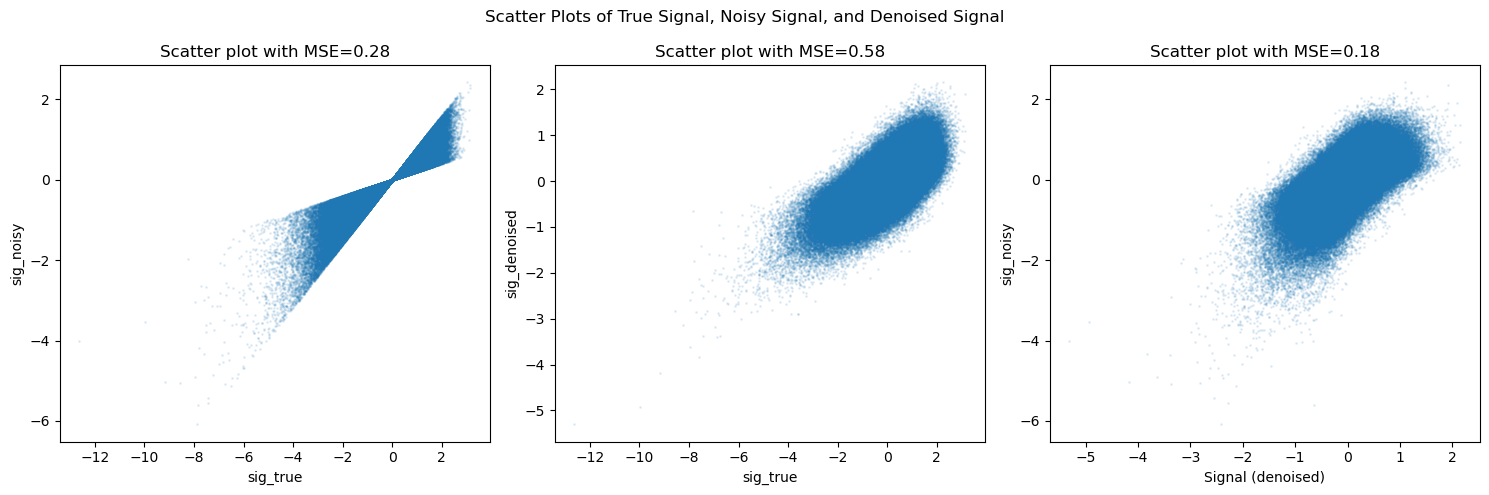

In [23]:
pygsp_graph = get_graph_magic(adata_uniform2)
sig_denoised_uniform2 = denoise_experiment(pygsp_graph, adata_uniform2.X, 'uniform')
mse_dict_uniform2 = compare_denoised_signal(adata.X, adata_uniform2.X, sig_denoised_gaussian)

In [24]:
import magic

Calculating MAGIC...
  Running MAGIC on 1000 cells and 500 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.11 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.26 seconds.
    Calculating affinities...
    Calculated affinities in 0.25 seconds.
  Calculated graph and diffusion operator in 0.65 seconds.
  Calculating imputation...
  Calculated imputation in 0.04 seconds.
Calculated MAGIC in 0.72 seconds.


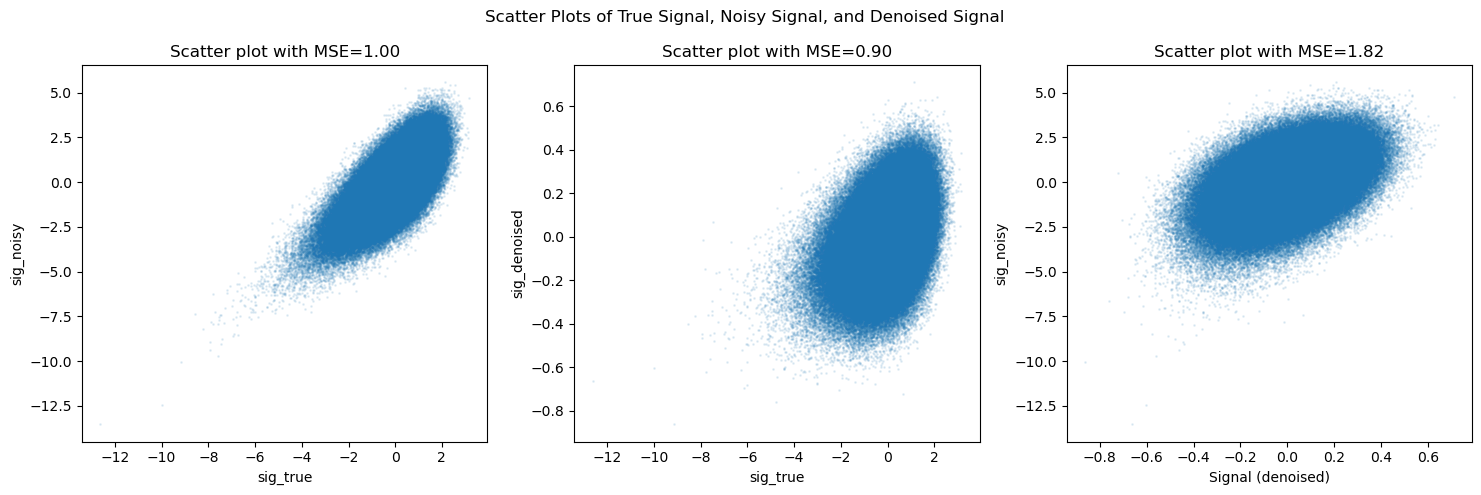

In [25]:
magic_op = magic.MAGIC()
magic_denoised_gaussian = magic_op.fit_transform(adata_gaussian.X)
magic_mse_dict_gaussian = compare_denoised_signal(adata.X, adata_gaussian.X, magic_denoised_gaussian)

Calculating MAGIC...
  Running MAGIC on 1000 cells and 500 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.09 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.31 seconds.
    Calculating affinities...
    Calculated affinities in 0.47 seconds.
  Calculated graph and diffusion operator in 0.91 seconds.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.03 seconds.


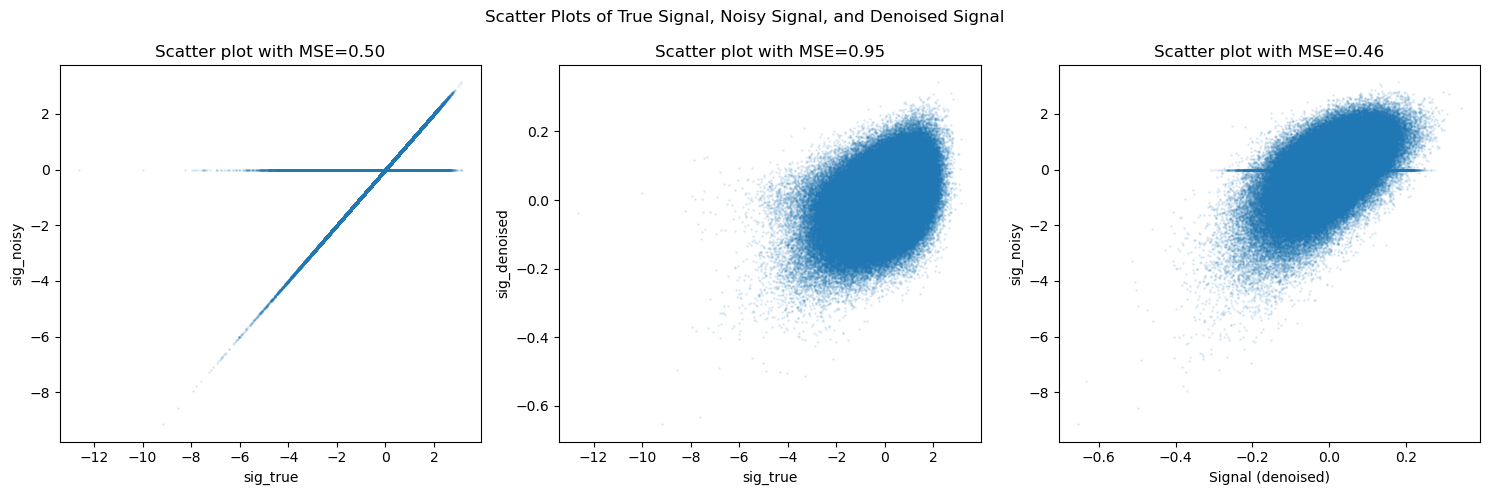

In [26]:
magic_op = magic.MAGIC()
magic_denoised_bernoulli = magic_op.fit_transform(adata_bernoulli.X)
magic_mse_dict_bernoulli = compare_denoised_signal(adata.X, adata_bernoulli.X, magic_denoised_bernoulli)

Calculating MAGIC...
  Running MAGIC on 1000 cells and 500 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.09 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.41 seconds.
    Calculating affinities...
    Calculated affinities in 0.36 seconds.
  Calculated graph and diffusion operator in 0.90 seconds.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.96 seconds.


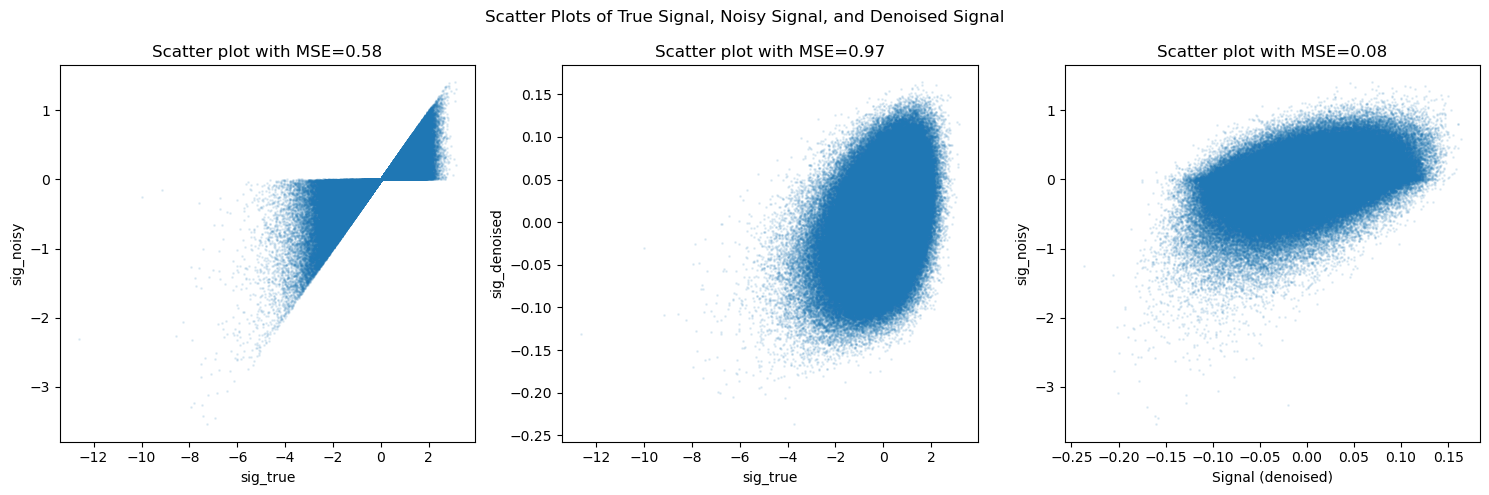

In [27]:
magic_op = magic.MAGIC()
magic_denoised_uniform1 = magic_op.fit_transform(adata_uniform1.X)
magic_mse_dict_uniform1 = compare_denoised_signal(adata.X, adata_uniform1.X, magic_denoised_uniform1)

Calculating MAGIC...
  Running MAGIC on 1000 cells and 500 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.13 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.25 seconds.
    Calculating affinities...
    Calculated affinities in 0.26 seconds.
  Calculated graph and diffusion operator in 0.69 seconds.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.76 seconds.


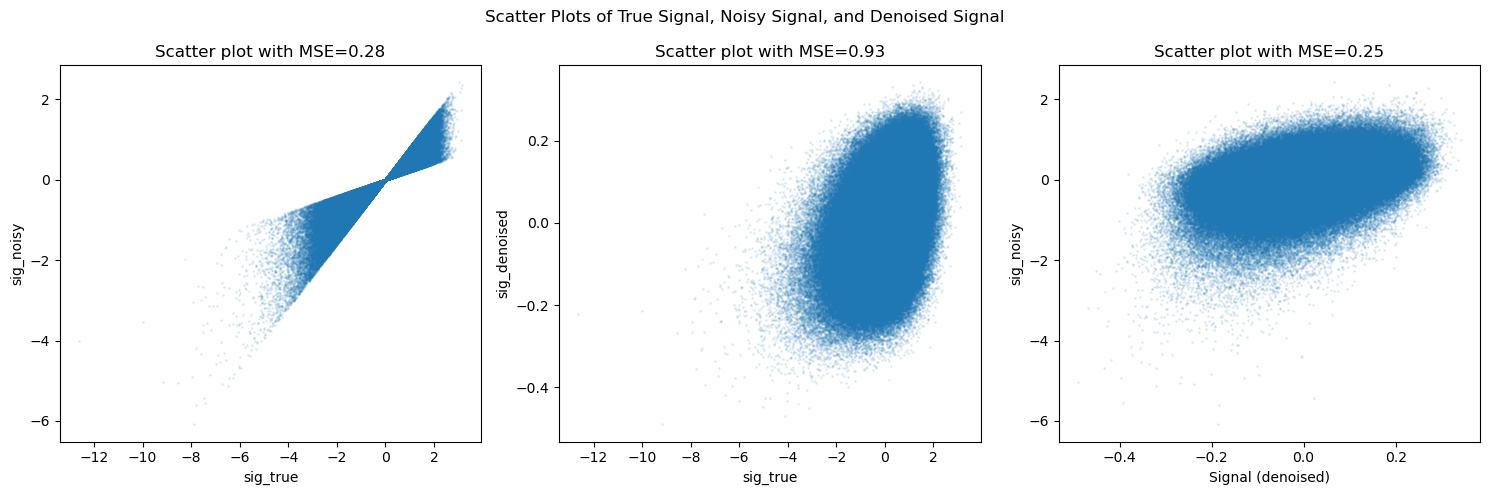

In [28]:
magic_op = magic.MAGIC()
magic_denoised_uniform2 = magic_op.fit_transform(adata_uniform2.X)
magic_mse_dict_uniform2 = compare_denoised_signal(adata.X, adata_uniform2.X, magic_denoised_uniform2)

In [29]:
magic_mse_dict_gaussian

{'MSE noisy': 0.99656737,
 'MSE denoised': 0.8968575724356136,
 'MSE denoised vs noisy': 1.8155791208831769}

In [30]:
magic_mse_dict_bernoulli

{'MSE noisy': 0.50082415,
 'MSE denoised': 0.9464855362628753,
 'MSE denoised vs noisy': 0.45574161450327394}